In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df2=pd.read_csv('/content/drive/Shareddrives/MediaEval_2023-24/Dataset/GDELT-Dataset-2023-Part2/GDELT-Dataset-2023-Part2-final/GDELT-P2-Test-Text.txt',sep='\t')

In [ ]:
df3=pd.read_csv('/content/drive/Shareddrives/MediaEval_2023-24/Dataset/GDELT-Dataset-2023-Part2/GDELT-Dataset-2023-Part2-final/GDELT-P2-Test-Img.txt',sep='\t')

In [ ]:
print(df2.head())


          # article                  aid  \
0  2023072018004890  20230720180000-1566   
1  2023072018000480  20230720180000-1568   
2  2023072018007390  20230720180000-1575   
3  2023072018003980  20230720180000-1586   
4  2023072018008950  20230720180000-1594   

                                                 url  img  iid  \
0  https://www.swiftcurrentonline.com/articles/ce...  NaN  NaN   
1  https://www.10news.com/police-neglected-childr...  NaN  NaN   
2  https://easternmirrornagaland.com/a-diplomatic...  NaN  NaN   
3  https://newtelegraphng.com/clark-rejects-calls...  NaN  NaN   
4  https://www.aol.com/florida-family-convicted-s...  NaN  NaN   

             hashvalue                                              title  \
0  20230720180000-1566  Celebrating 110 years of a proud southwest com...   
1  20230720180000-1568  Police: Neglected children escape 'terrible ho...   
2  20230720180000-1575  A Diplomatic Fight Breaks Out Between Iraq And...   
3  20230720180000-1586        

In [ ]:
print(df2.shape)

(1500, 10)


In [ ]:
print(df3.shape)

(1500, 10)


In [ ]:
print(df2["aid"][0])

20230720180000-1566


In [ ]:
final_list=[]

In [ ]:
#!pip install transformers
import transformers
from transformers import BertTokenizer,BertModel
import torch

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
'''
L=df1.iloc[:,-4:-3].values.tolist()
L1=df1.iloc[:,-3:-2].values.tolist()
L2=[0]*len(L)
print(L1)
print(L1[0][0])
print(L[0][0])
for i in range(0,len(L)):
  L2[i]=str(L[i][0])+" "+str(L1[i][0])
'''

G=df2.iloc[:,-4:-3].values.tolist()
G1=df2.iloc[:,-3:-2].values.tolist()
G2=[0]*len(G)
print(G1)
print(G1[0][0])
print(G[0][0])
for i in range(0,len(G)):
  G2[i]=str(G[i][0])+" "+str(G1[i][0])
print(G2[0])

print(G2[0])

# Example input text
#input_text = "This is an example sentence to be tokenized."
#input_text="Hello!! there is fire"
# Tokenize the input text
embeddings=[]
for i in range(1200,1500):
  input_text=G2[i]
  #print("aaaa: ",input_text)
  tokens = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

  # Obtain the embeddings
  with torch.no_grad():
      # Forward pass to get embeddings
      output = model(**tokens)
      # Extract the embeddings from the output
      embeddings.append(output.last_hidden_state)
      #print(i," : ",embeddings)
final=[]
final_sub=[]
for i in embeddings:
  final_sub=[]
  for j in i:
    for k in j:

      final_sub.extend(k)
  final.append(final_sub)
print(len(final[0]))
# for j in range(0,len(embeddings[0][0][i]))
  #final.extend(embeddings[0][0][i])
'''
print(list(embeddings))
print("\n\n")
print((embeddings[0]))
print(len(list(embeddings)))
print((len(embeddings[0][0])))
print(len(embeddings[0][0][0]))
print("\n\n")
#print(final)
print(len(final), len(final[0]))'''


[['hotel;economic development'], ['koch;rick eder;joel manke|'], ['khamenei;salwan momika;saddam hussein;tobias billstr;eid al-adha;mohammed shia al-sudani|ministry of communications;swedish embassy;iraq foreign ministry;ericsson;swedish foreign ministry;vienna convention;sadr mahdi army;communications commission;turkey embassy;iraqi embassy;finnish embassy'], ['lagabaja;bola tinubu;edwin clark;ahmed tinubu|amnesty programme;pan niger delta forum;army staff'], ['shipley;gustaf kilander;joseph grenon;mark grenon|miami herald;drug administration;genesis ii church;united states'], ['wesley;william shatner;chris connor;celia rose gooding uhura;nichelle nichols|'], ['al watan;sheikh mohamed;tayyip erdogan;abu dhabi;al zeyoudi|turkey business forum in abu dhabi on'], ['schlumpberger;rodrigo pasqua|mount rushmore national memorial;hills clean water alliance;environmental protection agency;department of environment natural resources;national park service;department of agriculture'], ['projects

'\nprint(list(embeddings))\nprint("\n\n")\nprint((embeddings[0]))\nprint(len(list(embeddings)))\nprint((len(embeddings[0][0])))\nprint(len(embeddings[0][0][0]))\nprint("\n\n")\n#print(final)\nprint(len(final), len(final[0]))'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
images1=[]
image_path1=[]
i=0
imgf1=df3["imgFile"]
base_path="/content/drive/Shareddrives/MediaEval_2023-24/Dataset/GDELT-Dataset-2023-Part2/GDELT-Dataset-2023-Part2-final/GDELT-P2-Test"
for imagepath in range(0,1500) :
  #print(imgf[imagepath])
  img11=(base_path+"/"+imgf1[imagepath])
  #print(img1)
  image_path1.append(img11)
  img1 = cv2.imread(base_path+"/"+imgf1[imagepath], cv2.IMREAD_COLOR)
  #print(img)
  images1.append(img1)
  #cv2_imshow(img1)


In [ ]:
#Image_feature_extraction
!pip install transformers
import torch
!pip install torch torchvision

!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
#
#from your_module import VSEModel



# Load pre-trained EfficientNet model
efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0')
efficientnet_model.eval()

# Image preprocessing
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
    return input_batch

# Function to extract image features
def extract_image_features(image_path, model):
    input_batch = preprocess_image(image_path)
    with torch.no_grad():
        output = model.extract_features(input_batch)

    # Global average pooling
    output = torch.nn.functional.adaptive_avg_pool2d(output, (1, 1))

    # Flatten and convert to a 1D numpy array
    image_features = output.squeeze().numpy()

    return image_features

# Example usage
'''# Upload your image to Colab and update the image_path variable
from google.colab import files

# Prompt the user to upload an image
uploaded = files.upload()

# Access the uploaded image path
image_path = list(uploaded.keys())[0]
print("aaaa")
print(image_path)'''
#print(image_path)
final_image_features=[]
for i in image_path1:

  image_features = extract_image_features(i, efficientnet_model)
  print("Image features shape:", image_features.shape)
  print("Sample Image Features:", np.round(image_features, 3))
  print("features: ",image_features)
  # Reshape to a power-of-two size (1024 in this case)
  desired_size = 1024
  reshaped_features = np.resize(image_features, desired_size)
  print("Reshaped features shape:", reshaped_features.shape)

  final_image_features.append(reshaped_features)

print(len(final_image_features[0]))
print(len(final_image_features))

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=16f51110a657e6998c77b3c0b6eda7fcc8b491dd08f1ec29e9da44f0b5a2178d
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 153MB/s] 


Streaming output truncated to the last 5000 lines.
Sample Image Features: [ 0.008 -0.107 -0.094 ... -0.049 -0.118  0.632]
features:  [ 0.00849507 -0.10664999 -0.09443938 ... -0.04892524 -0.11847937
  0.6323134 ]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [-0.164 -0.077  0.383 ...  0.216 -0.147 -0.104]
features:  [-0.16447313 -0.07683799  0.38288477 ...  0.21574976 -0.14736499
 -0.10436666]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [-0.047 -0.102 -0.021 ...  0.168 -0.11   0.703]
features:  [-0.04661601 -0.10237001 -0.02128234 ...  0.16757146 -0.11015597
  0.7032209 ]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [ 0.739 -0.059 -0.138 ... -0.142  0.002 -0.049]
features:  [ 0.73876756 -0.05853119 -0.13780303 ... -0.14167857  0.00156048
 -0.04933798]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [-0.155 -0.142 -0.049 ... -0.0

In [ ]:
#THIS IS THE LAST CODSE TO BE EXECUTED
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.functional import normalize, cosine_similarity
import copy
from torch.nn.utils.rnn import pad_sequence, pad_packed_sequence

# Assuming 'final' is your list of text features
# You can specify the maximum sequence length you want
max_seq_length = 393216  # Adjust as needed

# Pad the sequences to the specified length
padded_sequences = pad_sequence([torch.Tensor(seq) for seq in final], batch_first=True, padding_value=0)

# If the sequences are longer than max_seq_length, truncate them
padded_sequences = padded_sequences[:, :max_seq_length]

# If the sequences are shorter than max_seq_length, pad them
if padded_sequences.size(1) < max_seq_length:
    padding_size = max_seq_length - padded_sequences.size(1)
    pad_tensor = torch.zeros_like(padded_sequences[0, 0])  # Create a tensor with zeros of the same size
    padded_sequences = F.pad(padded_sequences, (0, padding_size), value=pad_tensor)
print(padded_sequences.shape)
text_features_list_3d = padded_sequences.unsqueeze(1)


class VSEModel(nn.Module):
    def __init__(self, text_dim, image_dim, output_dim):
        super(VSEModel, self).__init__()
        self.text_embedding = nn.Linear(text_dim, output_dim)
        self.image_embedding = nn.Linear(image_dim, output_dim)

    def forward(self, text_input, image_input):
        text_embedding = self.text_embedding(text_input)
        image_embedding = self.image_embedding(image_input)
        return text_embedding, image_embedding
'''def cosine_similarity(embedding1, embedding2):
    normalized_embedding1 = normalize(embedding1, p=2, dim=-1)
    normalized_embedding2 = normalize(embedding2, p=2, dim=-1)
    similarity = torch.matmul(embedding1, embedding2.t())
    #similarity = torch.clamp(similarity, min=-1, max=3)
    #print("maximum value: ",max(similarity))
    return similarity
def cosine_similarity(embedding1, embedding2):
    normalized_embedding1 = F.normalize(embedding1, p=2, dim=-1)
    normalized_embedding2 = F.normalize(embedding2, p=2, dim=-1)
    similarity = torch.matmul(normalized_embedding1, normalized_embedding2.t())
    return similarity'''
def cosine_similarity(embedding1, embedding2):
    normalized_embedding1 = F.normalize(embedding1, p=2, dim=-1)
    normalized_embedding2 = F.normalize(embedding2, p=2, dim=-1)
    similarity = torch.matmul(embedding1, embedding2.t())
    #similarity = torch.clamp(similarity, min=-1, max=1)
    return similarity
vse_model = VSEModel(393216, 1024, output_dim=1)

# Load the pre-trained model from a file
model_path = '/content/drive/Shareddrives/MediaEval_2023-24/weights/model_eng.pth'  # Replace with the actual file path
vse_model.load_state_dict(torch.load(model_path))
vse_model.eval()  # Set the model to evaluation mode

# Replace text_features_list and image_features_list with your actual lists
similarity_scores=[]
#aimilarity_scores_list
for i in range(0,300):
  final_list=[]
  similarity_scores=[]
  for j in range(0,1500):
    text_features_list = text_features_list_3d[i]  # Your list of text features
    image_features_list = [final_image_features[j]] # Your list of image features

    # Convert the features to PyTorch tensors
    text_features = torch.tensor(text_features_list)
    image_features = torch.tensor(image_features_list)

    # Use VSE++ model to obtain joint embeddings
    text_embedding, image_embedding = vse_model(text_features, image_features)
    #print("Text Embedding Shape:", text_embedding.shape)
    #print("Image Embedding Shape:", image_embedding.shape)

    joint_embeddings = torch.cat((text_embedding, image_embedding), dim=1)

    # Calculate cosine similarity between joint embeddings
    similarity_scores.append(cosine_similarity(joint_embeddings, joint_embeddings).tolist())

  # Convert the similarity scores to a nested list
  similarity_scores_list = similarity_scores
  #similarity_scores_list=[]
  final_list = [0] * len(similarity_scores_list)  # Initialize with zeros

  # Print the similarity scores
  #print(similarity_scores_list)

  for k in range(0, len(similarity_scores_list)):
    final_list[k] = similarity_scores_list[k][0][0]

 # for l in range(0,len(final_list)):
  #  final_list[l]=float(final_list[l]);
  # print(similarity_scores_list)
  # print(min(similarity_scores_list))
  # print(final_list)
  List_sorted=sorted(final_list, reverse=True)
  final1=List_sorted[:100]
  # print("The first 5 maximum values: ")
  # print(final1)
  # print(df3["iid"][final_list.index(final1[0])])
  # print(G2[0])
  with open("/content/drive/Shareddrives/MediaEval_2023-24/prediction_eng2.txt","a") as f:

        f.write(f"{df2['url'][i]}    {df3['iid'][final_list.index(final1[0])]}    {df3['iid'][final_list.index(final1[1])]}    {df3['iid'][final_list.index(final1[2])]}    {df3['iid'][final_list.index(final1[3])]}    {df3['iid'][final_list.index(final1[4])]}")
        f.write('\n')



torch.Size([300, 393216])


<ipython-input-18-f3a31fcf112a>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_features = torch.tensor(text_features_list)


In [ ]:
for i in range(0,1200):

    if((df2['aid'][i])=='20230720181500-2096'):
        print(i)
        break;




299


In [ ]:
df1=pd.read_csv('/content/drive/Shareddrives/MediaEval_2023-24/Dataset/GDELT-Dataset/GDELT-Dataset/GDELT-P1-Training.txt',sep='\t')

In [ ]:
#!pip install transformers
import transformers
from transformers import BertTokenizer,BertModel
import torch

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

L=df1.iloc[:,-4:-3].values.tolist()
L1=df1.iloc[:,-3:-2].values.tolist()
L2=[0]*len(L)
print(L1)
print(L1[0][0])
print(L[0][0])
for i in range(0,len(L)):
  L2[i]=str(L[i][0])+" "+str(L1[i][0])

'''
G=df2.iloc[:,-4:-3].values.tolist()
G1=df2.iloc[:,-3:-2].values.tolist()
G2=[0]*len(G)
print(G1)
print(G1[0][0])
print(G[0][0])
for i in range(0,len(G)):
  G2[i]=str(G[i][0])+" "+str(G1[i][0])
print(G2[0])

print(G2[0])
'''
# Example input text
#input_text = "This is an example sentence to be tokenized."
#input_text="Hello!! there is fire"
# Tokenize the input text
embeddings=[]
for i in range(0,10):
  input_text=G2[i]
  #print("aaaa: ",input_text)
  tokens = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

  # Obtain the embeddings
  with torch.no_grad():
      # Forward pass to get embeddings
      output = model(**tokens)
      # Extract the embeddings from the output
      embeddings.append(output.last_hidden_state)
      #print(i," : ",embeddings)
final=[]
final_sub=[]
for i in embeddings:
  final_sub=[]
  for j in i:
    for k in j:

      final_sub.extend(k)
  final.append(final_sub)
print(len(final[0]))
# for j in range(0,len(embeddings[0][0][i]))
  #final.extend(embeddings[0][0][i])
'''
print(list(embeddings))
print("\n\n")
print((embeddings[0]))
print(len(list(embeddings)))
print((len(embeddings[0][0])))
print(len(embeddings[0][0][0]))
print("\n\n")
#print(final)
print(len(final), len(final[0]))'''


[['products group;agricenter international'], ['carlee nichole russell|hoover police department'], ['oilers;nate perleberg;aaron lozano|parker co lightning'], ['pacific railway'], ['russo;fran kirby;beth mead;ellen white;leah williamson;lauren james;fourfourtwo adam clery;rachel daly;ella toone;chloe kelly;niamh charles;jess carter;alex greenwood;sarina wiegman|united states'], ['gallagher;abu dhabi;raja krishnamoorthi;antony blinken;janet yellen;neil shen|georgetown center;u s commerce department;sequoia capital;macquarie group;new york times;qualcomm;house select committee;chinese communist party;denglin technology;walden international'], ['roosevelt national park;national park service;yellowstone national park'], ['charles burham;cecile stelter;cindy ecklund|jamestown police department;cnn'], ['conger;deepa babington;kim coghill;naomi rovnick;tom westbrook;bernadette baum;rhys williams;chizu nomiyama|reuters;m t bank;nasdaq;federal reserve;hirtle callaghan co;silicon valley bank;gol

'\nprint(list(embeddings))\nprint("\n\n")\nprint((embeddings[0]))\nprint(len(list(embeddings)))\nprint((len(embeddings[0][0])))\nprint(len(embeddings[0][0][0]))\nprint("\n\n")\n#print(final)\nprint(len(final), len(final[0]))'

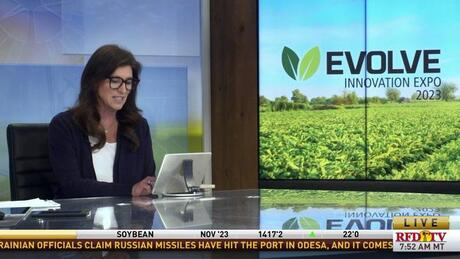

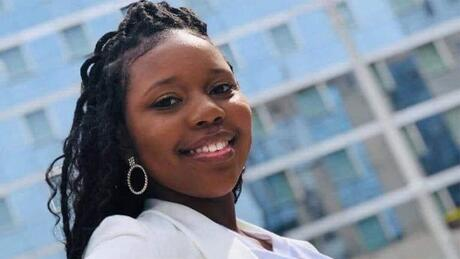

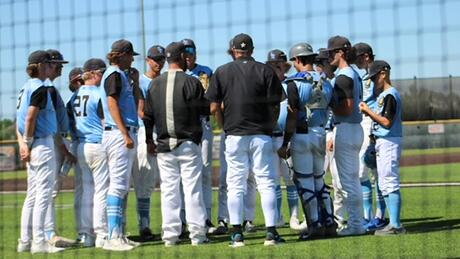

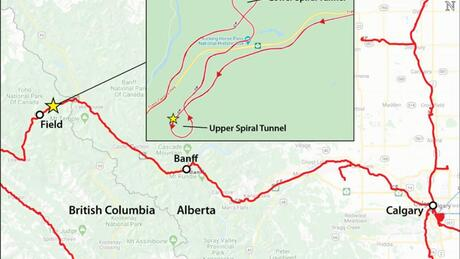

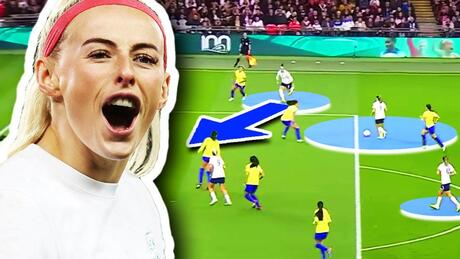

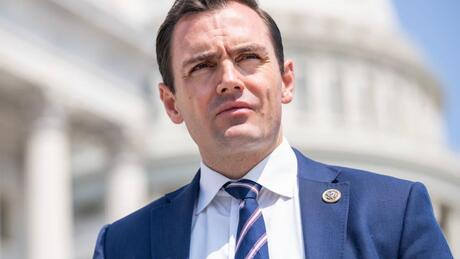

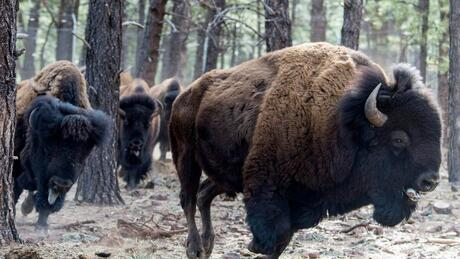

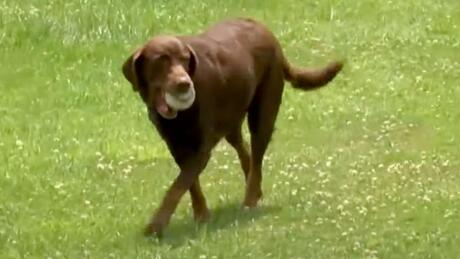

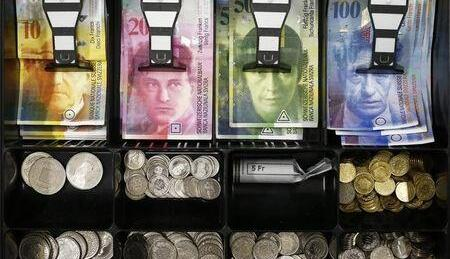

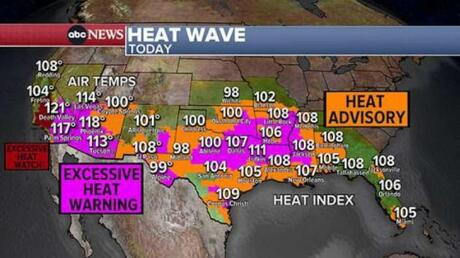

In [ ]:
from google.colab.patches import cv2_imshow
images=[]
image_path=[]
i=0
imgf=df1["imgFile"]
base_path="/content/drive/Shareddrives/MediaEval_2023-24/Dataset/GDELT-Dataset/GDELT-Dataset/GDELT-P1-Training"
for imagepath in range(0,10) :
  #print(imgf[imagepath])
  img1=(base_path+"/"+imgf[imagepath])
  #print(img1)
  image_path.append(img1)
  img = cv2.imread(base_path+"/"+imgf[imagepath], cv2.IMREAD_COLOR)
  #print(img)
  images.append(img)
  cv2_imshow(img)


In [ ]:
#Image_feature_extraction
import torch
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
#
#from your_module import VSEModel



# Load pre-trained EfficientNet model
efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0')
efficientnet_model.eval()

# Image preprocessing
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
    return input_batch

# Function to extract image features
def extract_image_features(image_path, model):
    input_batch = preprocess_image(image_path)
    with torch.no_grad():
        output = model.extract_features(input_batch)

    # Global average pooling
    output = torch.nn.functional.adaptive_avg_pool2d(output, (1, 1))

    # Flatten and convert to a 1D numpy array
    image_features = output.squeeze().numpy()

    return image_features

# Example usage
'''# Upload your image to Colab and update the image_path variable
from google.colab import files

# Prompt the user to upload an image
uploaded = files.upload()

# Access the uploaded image path
image_path = list(uploaded.keys())[0]
print("aaaa")
print(image_path)'''
#print(image_path)
final_image_features=[]
for i in image_path:

  image_features = extract_image_features(i, efficientnet_model)
  print("Image features shape:", image_features.shape)
  print("Sample Image Features:", np.round(image_features, 3))
  print("features: ",image_features)
  # Reshape to a power-of-two size (1024 in this case)
  desired_size = 1024
  reshaped_features = np.resize(image_features, desired_size)
  print("Reshaped features shape:", reshaped_features.shape)

  final_image_features.append(reshaped_features)

print(len(final_image_features[0]))
print(len(final_image_features))

Loaded pretrained weights for efficientnet-b0
Image features shape: (1280,)
Sample Image Features: [ 0.191  0.072  0.72  ...  0.413  0.233 -0.178]
features:  [ 0.1913418   0.0723499   0.7200783  ...  0.4133549   0.23292884
 -0.17774355]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [-0.086 -0.055  0.225 ...  0.108 -0.069 -0.13 ]
features:  [-0.08589751 -0.05464721  0.2246189  ...  0.10784126 -0.06941861
 -0.12998112]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [-0.104 -0.129 -0.036 ...  0.106 -0.018 -0.066]
features:  [-0.10384486 -0.12872545 -0.03578909 ...  0.10610574 -0.01809957
 -0.06615237]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [ 0.347 -0.102 -0.096 ... -0.047 -0.127  0.592]
features:  [ 0.34669766 -0.10223202 -0.09636234 ... -0.04679099 -0.12732525
  0.59236276]
Reshaped features shape: (1024,)
Image features shape: (1280,)
Sample Image Features: [ 0.0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.functional import normalize, cosine_similarity
import copy
from torch.nn.utils.rnn import pad_sequence, pad_packed_sequence

# Assuming 'final' is your list of text features
# You can specify the maximum sequence length you want
max_seq_length = 393216  # Adjust as needed

# Pad the sequences to the specified length
padded_sequences = pad_sequence([torch.Tensor(seq) for seq in final], batch_first=True, padding_value=0)

# If the sequences are longer than max_seq_length, truncate them
padded_sequences = padded_sequences[:, :max_seq_length]

# If the sequences are shorter than max_seq_length, pad them
if padded_sequences.size(1) < max_seq_length:
    padding_size = max_seq_length - padded_sequences.size(1)
    pad_tensor = torch.zeros_like(padded_sequences[0, 0])  # Create a tensor with zeros of the same size
    padded_sequences = F.pad(padded_sequences, (0, padding_size), value=pad_tensor)
print(padded_sequences.shape)
text_features_list_3d = padded_sequences.unsqueeze(1)


class VSEModel(nn.Module):
    def __init__(self, text_dim, image_dim, output_dim):
        super(VSEModel, self).__init__()
        self.text_embedding = nn.Linear(text_dim, output_dim)
        self.image_embedding = nn.Linear(image_dim, output_dim)

    def forward(self, text_input, image_input):
        text_embedding = self.text_embedding(text_input)
        image_embedding = self.image_embedding(image_input)
        return text_embedding, image_embedding
'''def cosine_similarity(embedding1, embedding2):
    normalized_embedding1 = normalize(embedding1, p=2, dim=-1)
    normalized_embedding2 = normalize(embedding2, p=2, dim=-1)
    similarity = torch.matmul(embedding1, embedding2.t())
    #similarity = torch.clamp(similarity, min=-1, max=3)
    #print("maximum value: ",max(similarity))
    return similarity
def cosine_similarity(embedding1, embedding2):
    normalized_embedding1 = F.normalize(embedding1, p=2, dim=-1)
    normalized_embedding2 = F.normalize(embedding2, p=2, dim=-1)
    similarity = torch.matmul(normalized_embedding1, normalized_embedding2.t())
    return similarity'''
def cosine_similarity(embedding1, embedding2):
    normalized_embedding1 = F.normalize(embedding1, p=2, dim=-1)
    normalized_embedding2 = F.normalize(embedding2, p=2, dim=-1)
    similarity = torch.matmul(normalized_embedding1, normalized_embedding2.t())
    #similarity = torch.clamp(similarity, min=-1, max=1)
    return similarity
vse_model = VSEModel(393216, 1024, output_dim=1)

# Load the pre-trained model from a file
model_path = '/content/drive/Shareddrives/MediaEval_2023-24/weights/Copy of model_eng5.pth'  # Replace with the actual file path
vse_model.load_state_dict(torch.load(model_path))
vse_model.eval()  # Set the model to evaluation mode

# Replace text_features_list and image_features_list with your actual lists
similarity_scores=[]
#aimilarity_scores_list
for i in range(0,10):
  final_list=[]
  similarity_scores=[]
  for j in range(0,10):
    text_features_list = text_features_list_3d[i]  # Your list of text features
    image_features_list = [final_image_features[j]] # Your list of image features

    # Convert the features to PyTorch tensors
    text_features = torch.tensor(text_features_list)
    image_features = torch.tensor(image_features_list)

    # Use VSE++ model to obtain joint embeddings
    text_embedding, image_embedding = vse_model(text_features, image_features)
    #print("Text Embedding Shape:", text_embedding.shape)
    #print("Image Embedding Shape:", image_embedding.shape)

    joint_embeddings = torch.cat((text_embedding, image_embedding), dim=1)

    # Calculate cosine similarity between joint embeddings
    similarity_scores.append(cosine_similarity(joint_embeddings, joint_embeddings).tolist())

  # Convert the similarity scores to a nested list
  similarity_scores_list = similarity_scores
  #similarity_scores_list=[]
  final_list = [0] * len(similarity_scores_list)  # Initialize with zeros

  # Print the similarity scores
  print(similarity_scores_list)

  for k in range(0, len(similarity_scores_list)):
    final_list[k] = similarity_scores_list[k][0][0]

 # for l in range(0,len(final_list)):
  #  final_list[l]=float(final_list[l]);
  print(similarity_scores_list)
  print(min(similarity_scores_list))
  print(final_list)
  List_sorted=sorted(final_list, reverse=True)
  final1=List_sorted[:200]
  print("The first 5 maximum values: ")
  print(final1)
  print(df1["iid"][final_list.index(final1[0])])
  print(L2[i])
  with open("/content/drive/Shareddrives/MediaEval_2023-24/prediction_eng.txt","a") as f:
     f.write(df2["aid"][i],"\t",df3["iid"][final_list.index(final1[0])],"\t",df3["iid"][final_list.index(final1[1])],"\t",df3["iid"][final_list.index(final1[2])],"\t",df3["iid"][final_list.index(final1[3])],"\t",df3["iid"][final_list.index(final1[4])],"\n")

torch.Size([10, 393216])
[[[0.9999998807907104]], [[0.9999999403953552]], [[0.9999999403953552]], [[0.9999999403953552]], [[0.9999999403953552]], [[0.9999999403953552]], [[1.0000001192092896]], [[0.9999999403953552]], [[0.9999999403953552]], [[1.0]]]
[[[0.9999998807907104]], [[0.9999999403953552]], [[0.9999999403953552]], [[0.9999999403953552]], [[0.9999999403953552]], [[0.9999999403953552]], [[1.0000001192092896]], [[0.9999999403953552]], [[0.9999999403953552]], [[1.0]]]
[[0.9999998807907104]]
[0.9999998807907104, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 1.0000001192092896, 0.9999999403953552, 0.9999999403953552, 1.0]
The first 5 maximum values: 
[1.0000001192092896, 1.0, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.9999998807907104]
A053193F3F526ED7B1E5A21291012A39
Helena Agri-Enterprises hosts Evolve Innovations Expo in Memphis p

<ipython-input-85-37cfa35978ad>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_features = torch.tensor(text_features_list)


In [ ]:
print(similarity_scores_list[0][0][0])

0.5555218458175659


In [ ]:
List_sorted=sorted(final_list, reverse=True)
final1=List_sorted[:5]
print("The first 5 maximum values: ")
print(final1)

In [ ]:
print(df2[aid[0]])
print(df3[iid][final_list.index(final1[0])])

In [ ]:
with open("/content/drive/Shareddrives/MediaEval_2023-24/prediction_eng.txt","a") as f:
  f.write(df2[aid][i],"\t",df3[iid][final_list.index(final1[0])],"\t",df3[iid][final_list.index(final1[1])],"\t",df3[iid][final_list.index(final1[2])],"\t",df3[iid][final_list.index(final1[3])],"\t",df3[iid][final_list.index(final1[4])])